# Mapping King County w/ Opportunity Youth Population Figures

This notebook describes the process of importing and cleaning King County Washington map data, and then plotting into a figure used in our report

## Load necessary packages

In [1]:
# make sure you are in oy-env environment
%matplotlib inline
import geopandas as gpd
from matplotlib import pyplot as plt
import pandas as pd

## Load necessary data and process for mapping

In [2]:
# Import Washington PUMA Data with GeoPandas Shape data in Geometry column
wa_puma = gpd.read_file("data/raw/tl_2017_53_puma10.shp") 

# Loads Opportunity Youth Population data obtained from a Postgresql database
oy_per_puma_df = pd.read_csv('data/processed/oy_per_puma.csv')

# Imports Job Availability for people under 29 years old by PUMA#, from a Postgresql database
jobs_per_puma_df = pd.read_csv('data/processed/jobs_per_puma.csv')

# Converts PUMACE10 Column from string to integer
wa_puma.loc[:,'PUMACE10'] = wa_puma['PUMACE10'].astype(int)

# Selects all PUMA codes for King County (including Seattle) PUMAs and puts into Subset
kc_puma = wa_puma.loc[(wa_puma.PUMACE10 >= 11601 ) & (wa_puma.PUMACE10 <= 11616)]

# List of PUMA #'s for S. Seattle and S. King County
skc_puma_list = [11604, 11605, 11610, 11611, 11612, 11613, 11614]

## Creates a new column, KCS and assigns a 1 if the PUMA is in S. King Country/S. Seattle, or 0 otherwise. This is
# used to map the gray portion of the figure
skc_puma = kc_puma.assign(SKC = [1 if row in skc_puma_list else 0 for row in kc_puma['PUMACE10']]) 

# inner join with KC data to make a SKC only subset with the OY Population Data Added
skc_chloro = pd.merge(skc_puma, oy_per_puma_df, on='PUMACE10', how='inner')

# inner join with jobs data, to map jobs available per PUMA region
skc_jobs_chloro = pd.merge(skc_puma, jobs_per_puma_df, on='PUMACE10', how='inner')

## Visualization of South King County

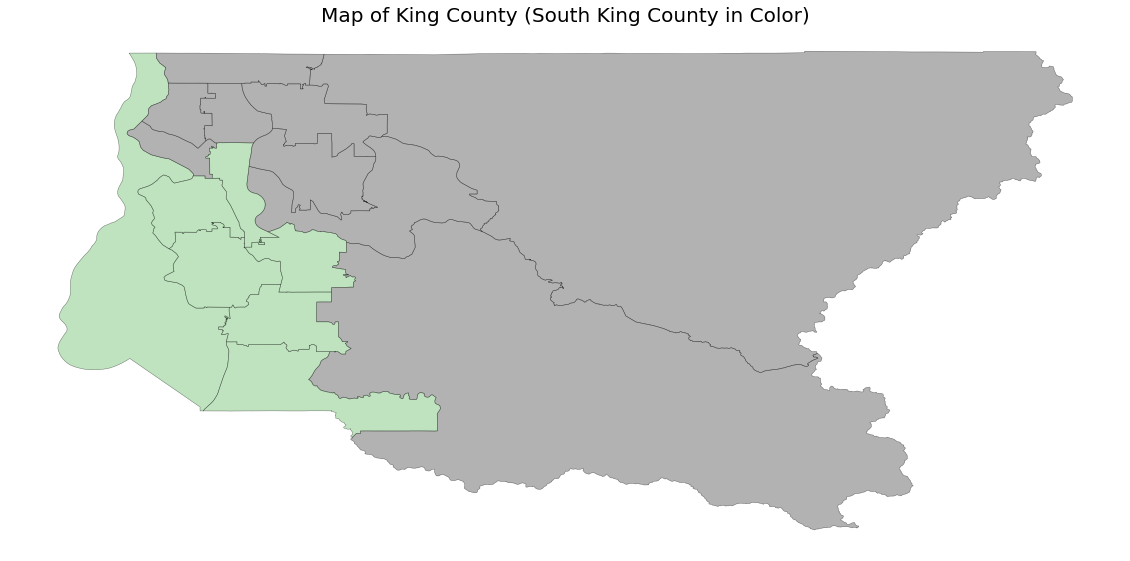

In [3]:
# Plots a map of King County, with South King County and South Seattle in color
fig, ax = plt.subplots(1, figsize=(20, 16))
ax = skc_puma.plot(ax=ax, 
              column='SKC', cmap='Accent_r', alpha = .5, linewidth=.5, edgecolor='black',  legend = False)
ax.set_title('Map of King County (South King County in Color)', fontsize = 20)
ax.set_axis_off()
fig.tight_layout
plt.show();

# Chloropleth Map of South King County (with OY Population)

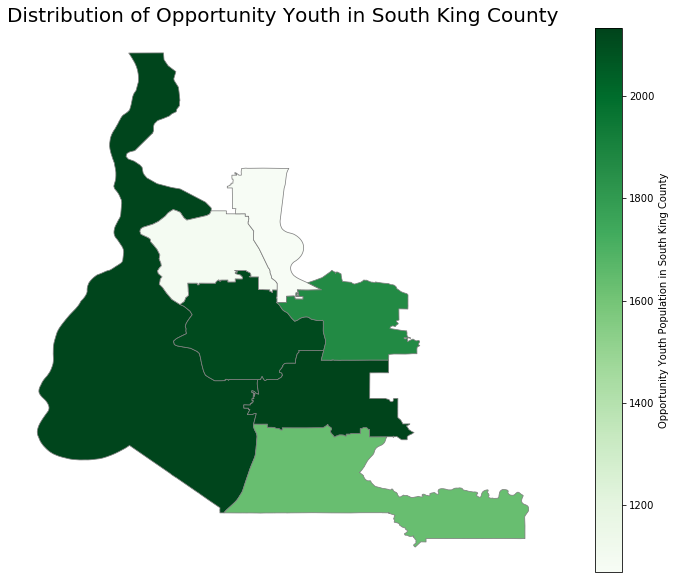

In [4]:
# Plots a map of King County, and South King County as a Chloropleth map with Opportunity Youth Population Data
# There are two plots, as we wanted the rest of King County to be another color than the chloropleth data
fig, ax = plt.subplots(1, figsize=(15, 10))
ax = skc_chloro.plot(ax=ax, 
              column='total_per_region', 
              alpha = 1, legend = True, 
              cmap= 'Greens',
              linewidth= 0.75,
              edgecolor = 'grey',
              legend_kwds={'label': "Opportunity Youth Population in South King County", 'orientation': "vertical"
                          })

ax.set_title('Distribution of Opportunity Youth in South King County', fontsize = 20)
ax.set_axis_off()
fig.tight_layout
plt.savefig('SKC OY Population.png', transparent = True, dpi = 150)
plt.show();

# Chloropleth Map of South King County Job Availability Data

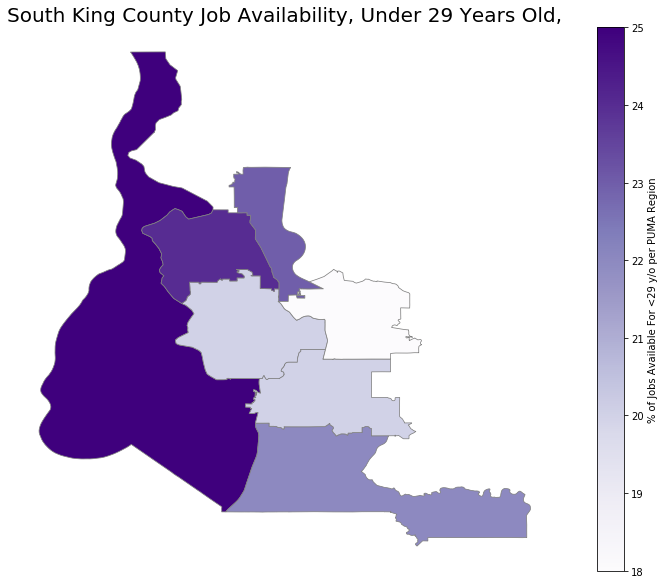

In [5]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax = skc_jobs_chloro.plot(ax=ax, 
              column = 'percentage_for_under_29 ', 
              alpha = 1, legend = True, 
              cmap= 'Purples',
              linewidth= 0.75,
              edgecolor = 'grey',
              legend_kwds={'label': "% of Jobs Available For <29 y/o per PUMA Region", 'orientation': "vertical"
                          })

ax.set_title('South King County Job Availability, Under 29 Years Old,', fontsize = 20)
ax.set_axis_off()
fig.tight_layout
plt.show();